# Capstone Project: Stroke Prediction

## 2. EDA

In [1]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in cleaned data
stroke = pd.read_csv('cleaned_data/stroke.csv')
# Take a look
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never_smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never_smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly_smoked,1


In [3]:
# Create a new dataframe of those stroke patients
stroke_population = stroke.loc[(stroke['stroke']== 1)]
stroke_population.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never_smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never_smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly_smoked,1


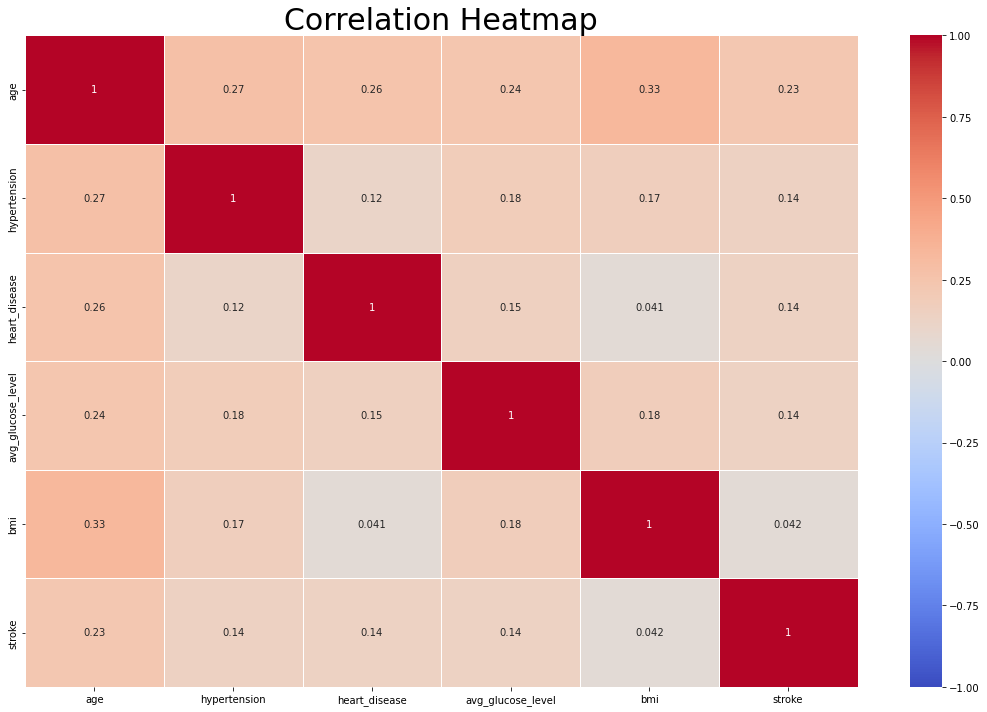

In [4]:
# Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(stroke.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, linewidths=1)
plt.title('Correlation Heatmap', fontsize = 30);

plt.tight_layout()

# Save image
plt.savefig('images/correlation')

- no strong correlations
- `age` is most correlated with `stroke` at 0.23
- highest correlation can be observed between `bmi` and `age`
- weakest correlation can be observed between `bmi` and `heart_disease`

<Figure size 1080x720 with 0 Axes>

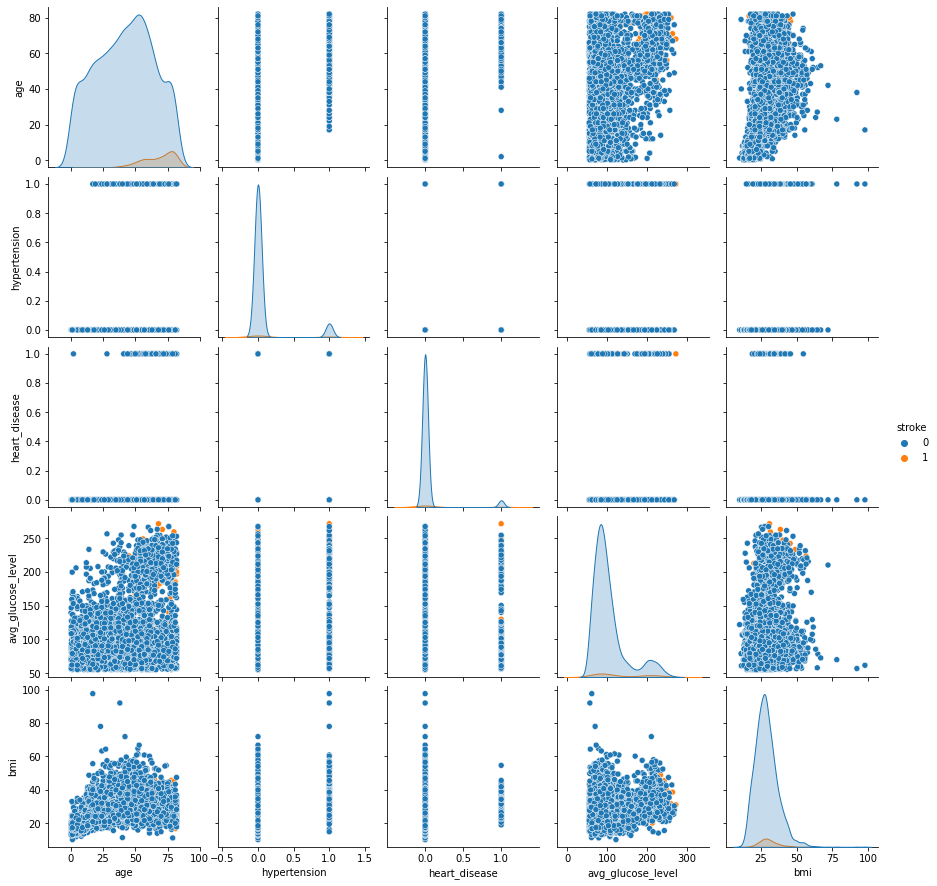

In [48]:
# Pairplot
plt.figure(figsize = (15,10))
sns.pairplot(stroke, hue = 'stroke');

# Save image
plt.savefig('images/pairplot')

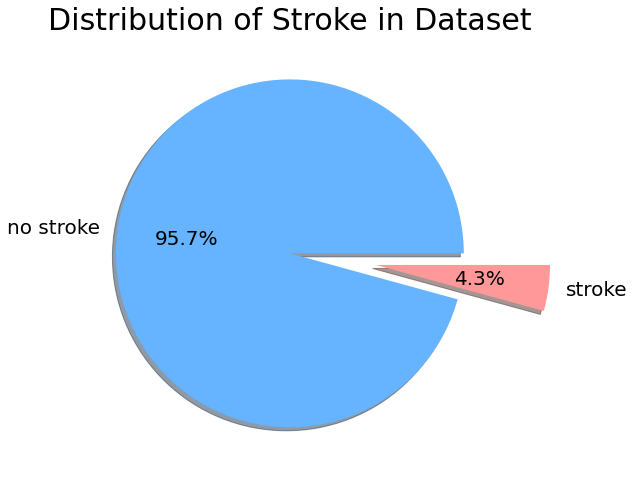

In [5]:
# Distribution of stroke and non stroke patients in the dataset
plt.figure(figsize = (15, 8))
plt.pie(stroke['stroke'].value_counts(),colors = ['#66b3ff', '#ff9999'], labels= ('no stroke', 'stroke'), explode = (0, 0.5), autopct='%1.1f%%', shadow=True, textprops={'fontsize': 20})
plt.title('Distribution of Stroke in Dataset', fontsize = 30);

# Save image
plt.savefig('images/stroke_distribution')

- dataset is very imbalanced
- less than 5% of the dataset are stroke patients

In [6]:
def distribution(feature):
    '''
    Visualize distribution of a variable by counting the number of observations that fall within disrete bins
    '''
    plt.figure(figsize = (15, 8))
    sns.histplot(data=stroke, x=feature, kde=True)
    plt.xlabel(feature.capitalize(), fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.title(feature.capitalize().replace('_', ' ')+' '+'Distribution', fontsize = 30);
    
    plt.tight_layout()
    
    # Save image
    plt.savefig('images/'+ feature +'_distribution')

In [7]:
def relationship(feature):
    '''
    Visualize relationship between variable and stroke
    '''
    plt.figure(figsize = (15, 8))
    sns.histplot(x=stroke[stroke['stroke'] == 1][feature], kde=True, color = 'lightcoral')

    plt.xlabel(feature.capitalize(), fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.title('Relationship Between Stroke and ' + feature.capitalize().replace('_', ' '), fontsize = 30);
    
    plt.tight_layout()
    
    # Save image
    plt.savefig('images/'+ 'relationship_'+feature)

In [8]:
def countplot(feature):
    '''
    Visualize the counts of observations in each categorical bin using bars
    '''
    # Create count plot
    plt.figure(figsize = (15, 8))
    ax = sns.countplot(data = stroke, x = 'stroke',hue = feature, palette='Dark2')
    plt.title('Stroke by '+feature.capitalize().replace('_', ' '), fontsize = 30);
    plt.xlabel('Stroke', fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.legend(fontsize = '15', title_fontsize = '20')
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.tight_layout()
    
    # Save image
    plt.savefig('images/'+ feature)

In [9]:
def boxplot(feature):
    '''
    Visualize the distribution of features against age among stroke patients 
    '''
    # Create bar plot
    plt.figure(figsize = (15, 8))
    sns.boxplot(orient = 'h', y = 'stroke', x = 'age', hue=feature,  data = stroke_population);
    plt.xlabel('Age', fontsize = 20)
    plt.ylabel('Stroke', fontsize = 20)
    plt.title('Distribution of'+' '+feature.capitalize().replace('_', ' ')+' '+'Against Age Among Stroke Patients' , fontsize = 30);
    
    plt.tight_layout()
    
    # Save image
    plt.savefig('images/'+ feature +'_distribution')

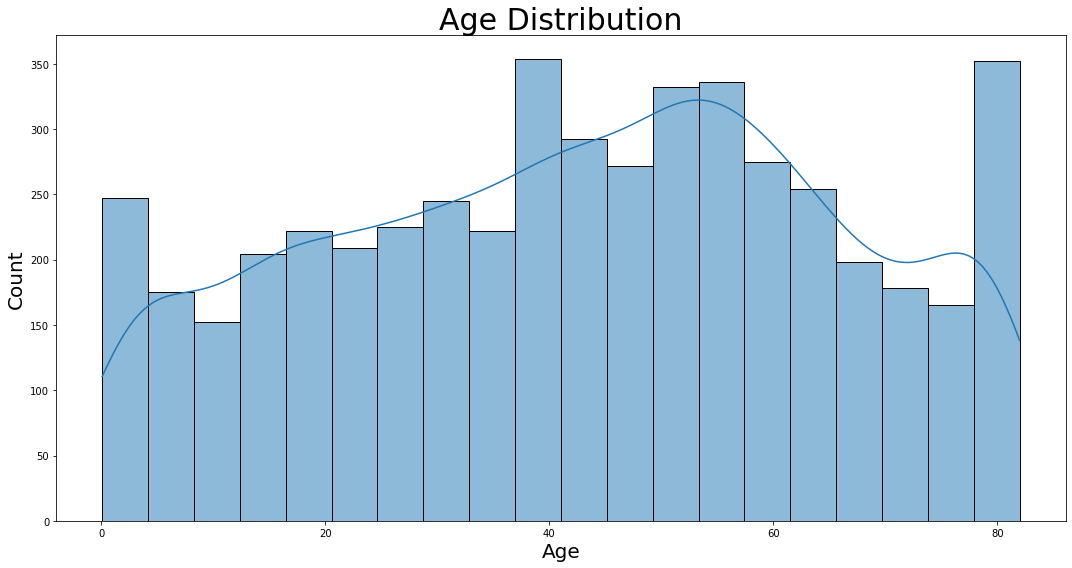

In [10]:
# Age distribution
distribution('age')

- age is distributed between 0 and 80 almost evenly

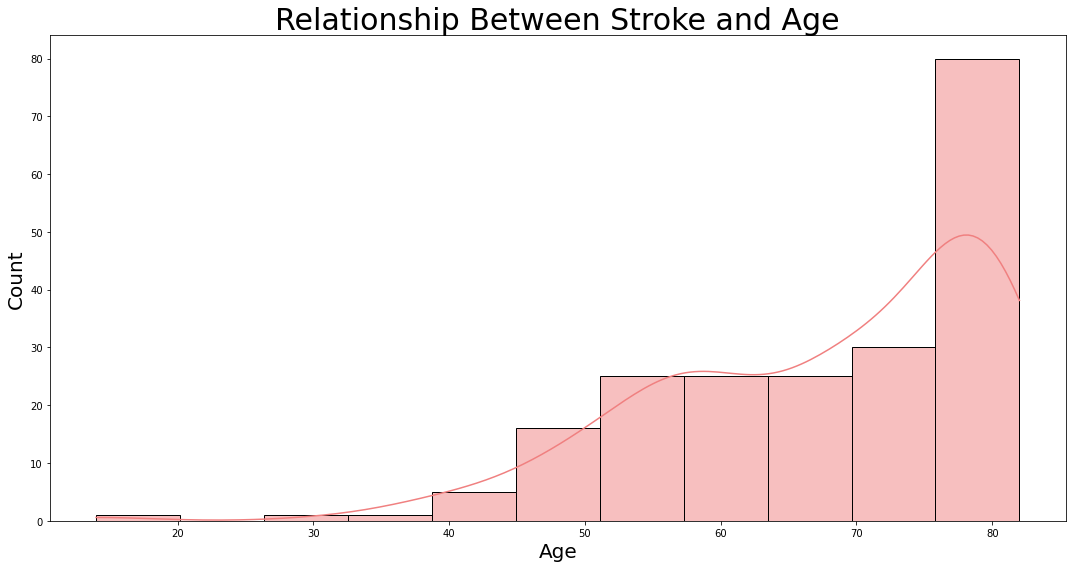

In [11]:
# Distribution of age among stroke patients 
relationship('age')

- there is a positive relationship bwtween stroke and age
- as age increases, chances of stroke increases

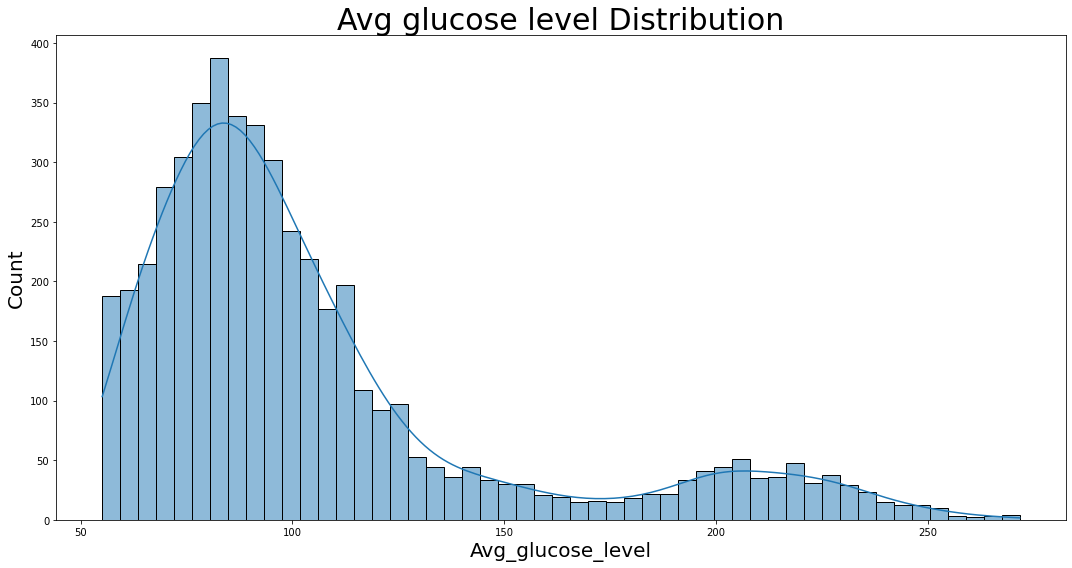

In [12]:
# Average glucose level distribution
distribution('avg_glucose_level')

- right skewed distribution of average glucose level
- most of the distribution is between 50-150
- average glucose level of 140 or less is normal so most of the paitents in the dataset don't have diabetes 

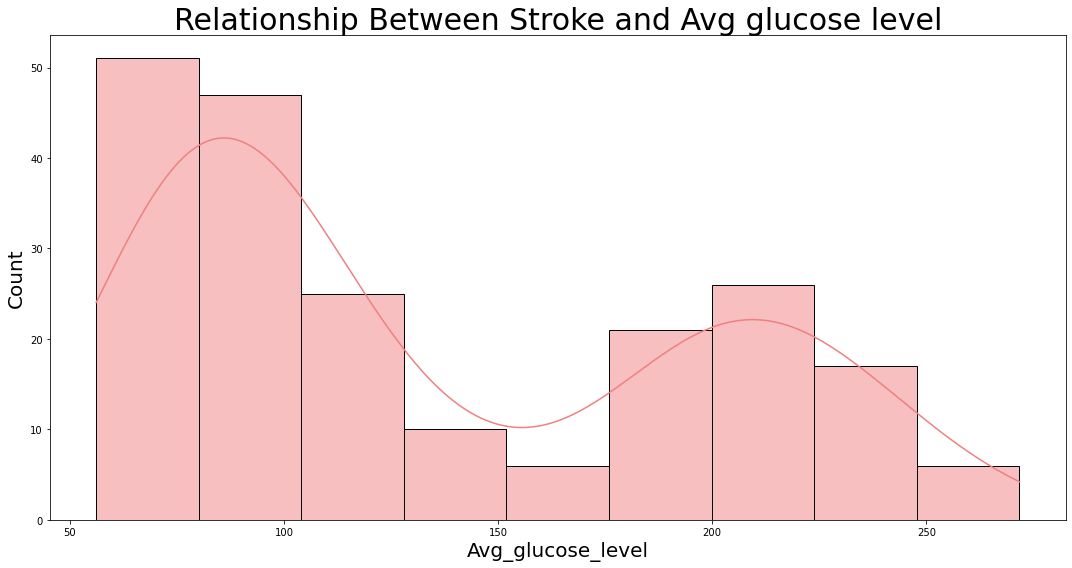

In [13]:
# Distribution of average glucose level among stroke patients 
relationship('avg_glucose_level')

- average glucose level peaks at around 100 and 200 among stroke patients
- from this dataset, not helpful in knowing if diabetes and stroke are correlated

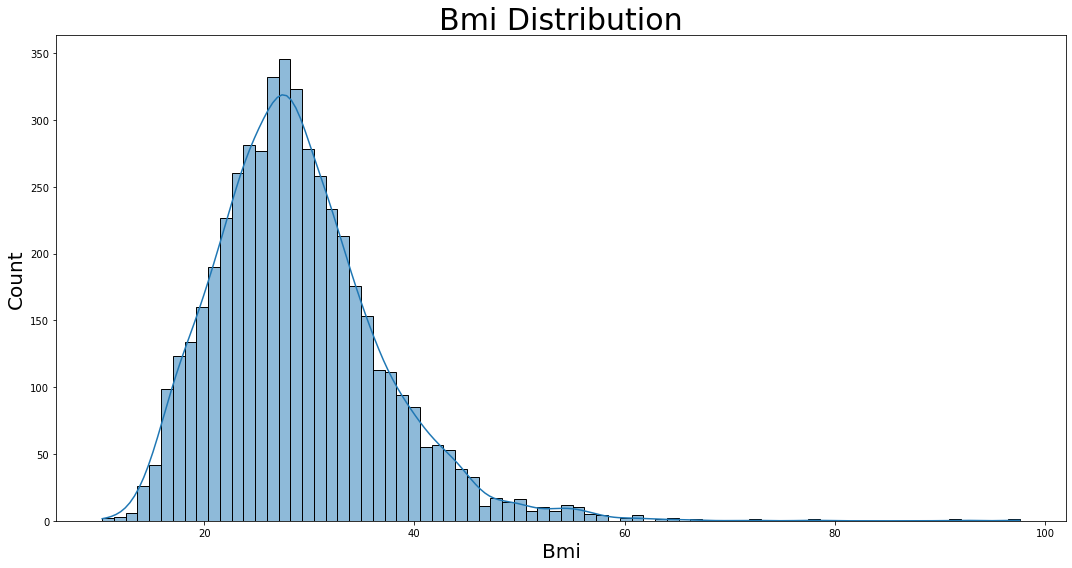

In [14]:
# BMI distribution 
distribution('bmi')

- seems like there are some outliers for BMI 
- BMI between 18.5—24.9 is healthy
- BMI is between 20 and 40 for most of the patients

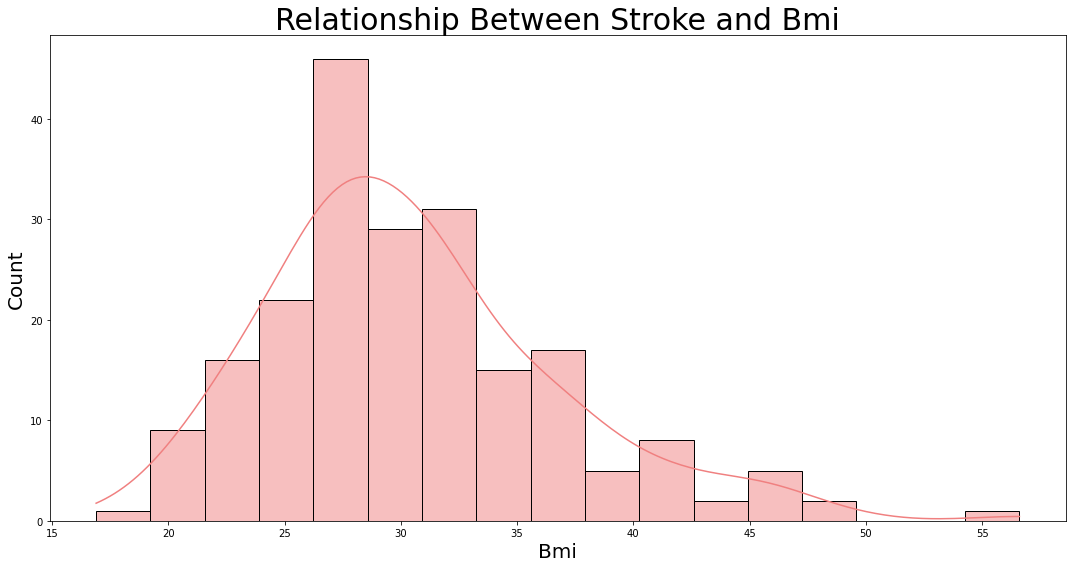

In [15]:
# Distribution of bmi among stroke patients 
relationship('bmi')

- of the stroke patients, most of them have BMI over 25 which is considered overweight and obese

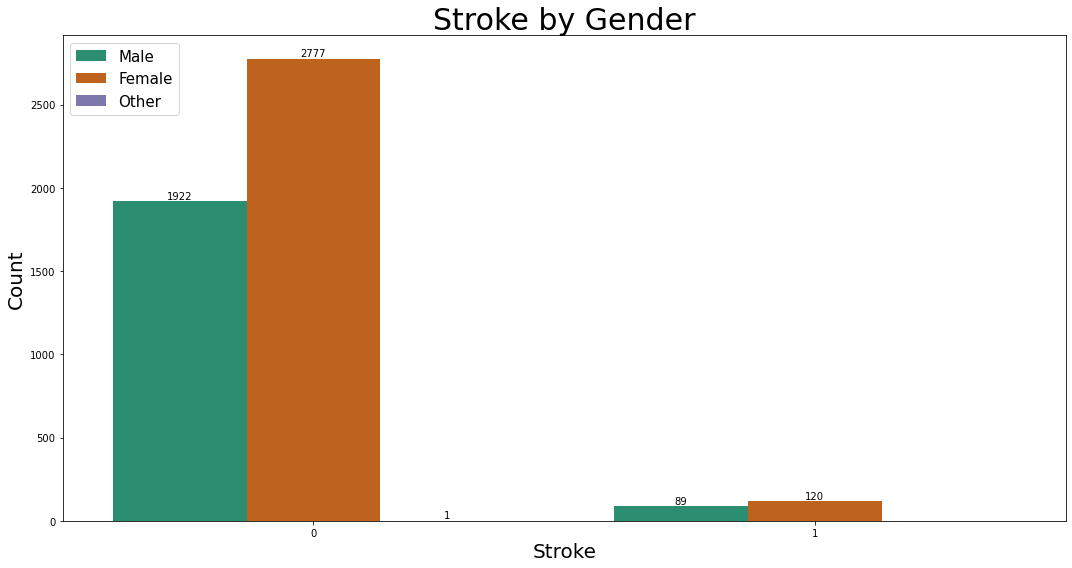

In [16]:
# Gender 
countplot('gender')

- dataset contains more female patients

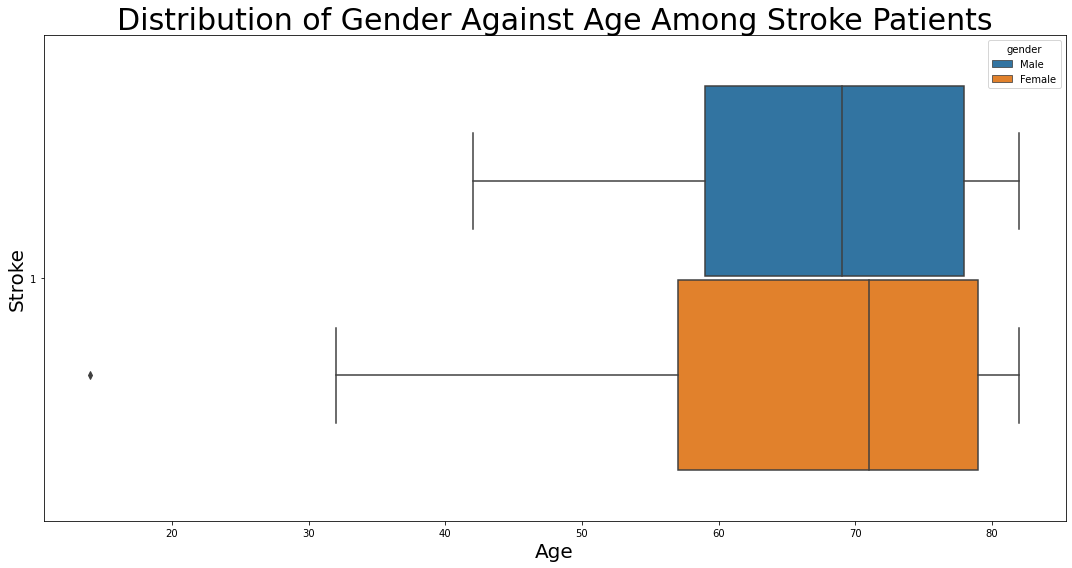

In [17]:
# Gender
boxplot('gender')

- median age for female stroke patients: ~71
- median age for male stroke patients: ~69

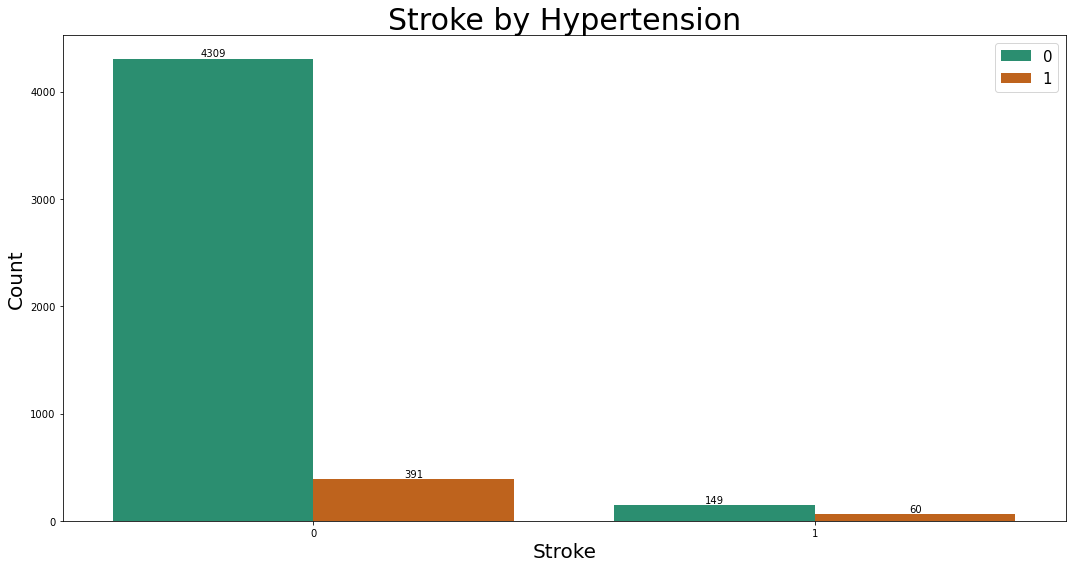

In [18]:
# Hypertension
countplot('hypertension')

- most patients don't have hypertension
- less than 30% of the stroke patients have hypertension

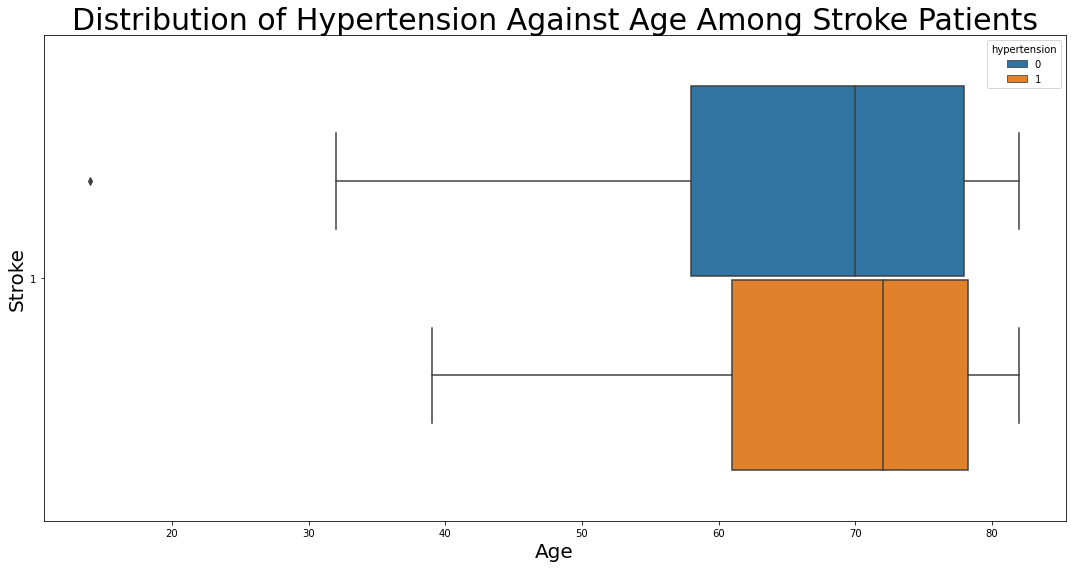

In [19]:
# Hypertension
boxplot('hypertension')

- median age for non-hypertension stroke patients: ~70
- median age for hypertension stroke patients: ~72

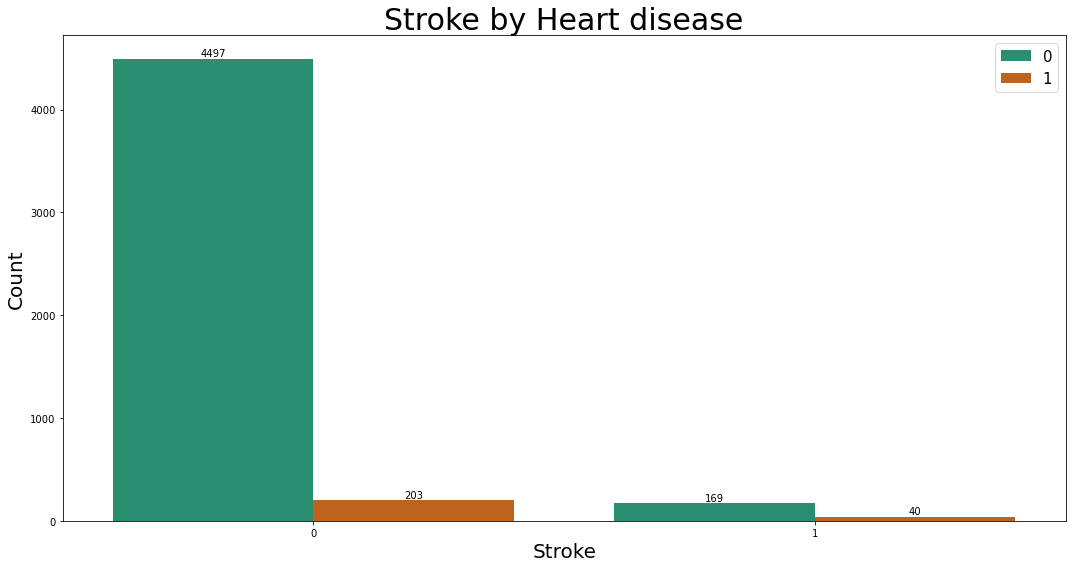

In [20]:
# Heart disease 
countplot('heart_disease')

- most of the patients who have had a stroke do not have any heart disease

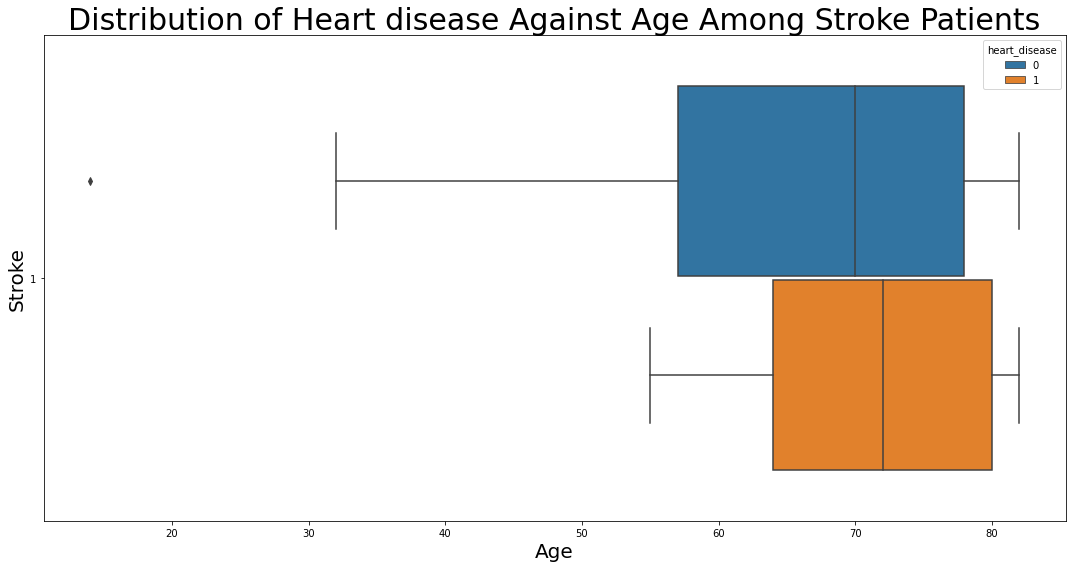

In [21]:
# Heart disease 
boxplot('heart_disease')

- median age for non-heart disease stroke patients: ~70
- median age for heart disease stroke patients: ~72

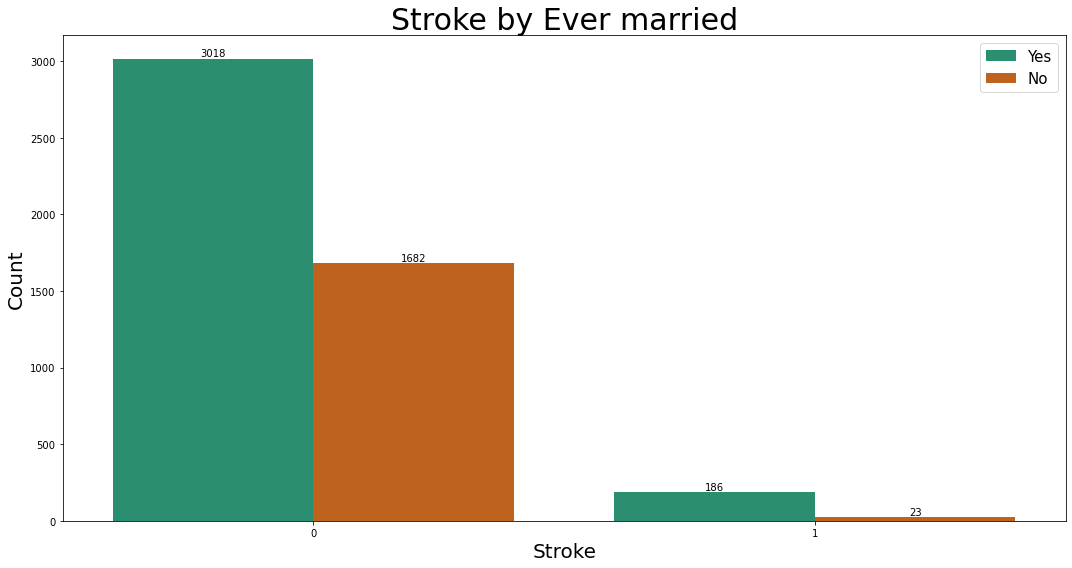

In [22]:
# Ever married
countplot('ever_married')

- ratio is at about 2:1 for being married or had been married 
- of the stroke patients, about 89% are married

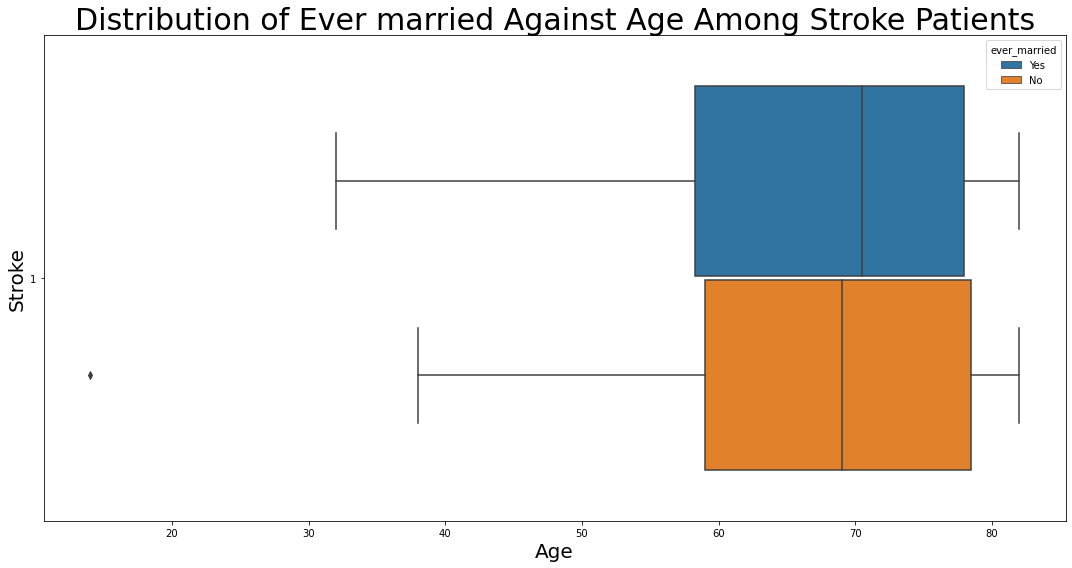

In [23]:
# Ever married
boxplot('ever_married')

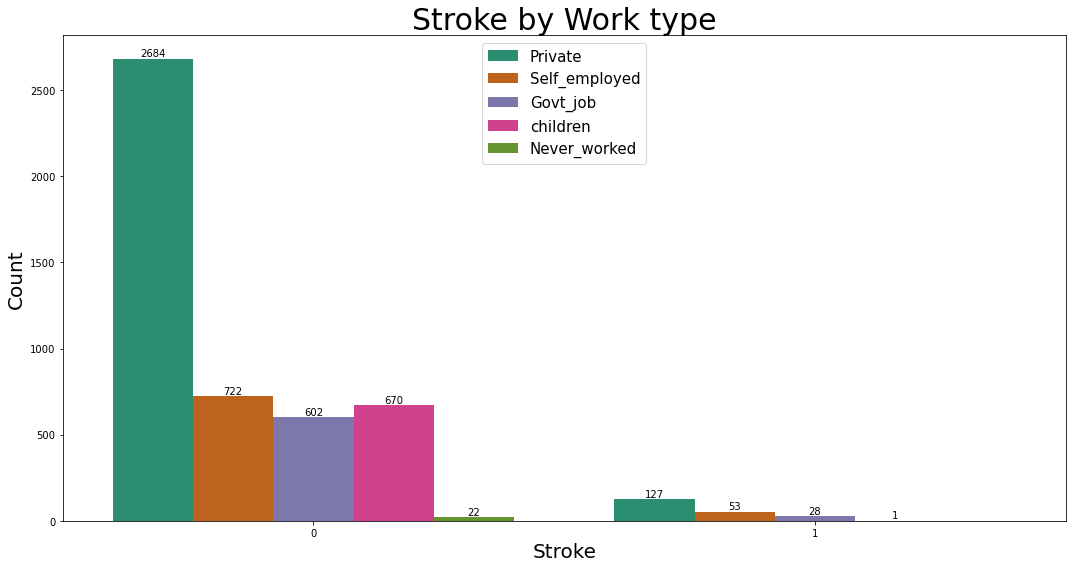

In [24]:
# Work type
countplot('work_type')

- most patients work in private sectors and has the most stroke patients

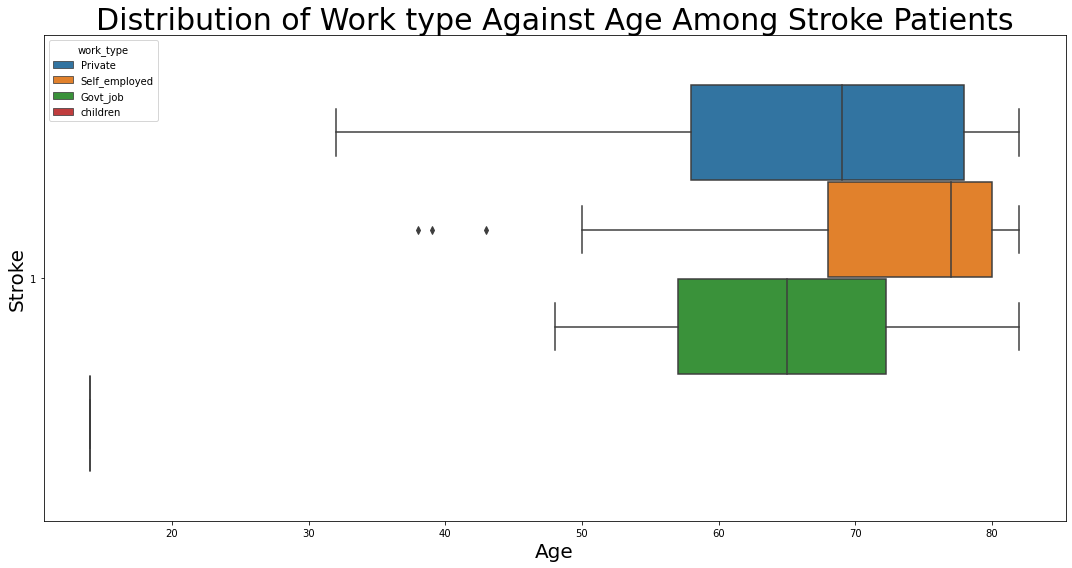

In [25]:
# Work type
boxplot('work_type')

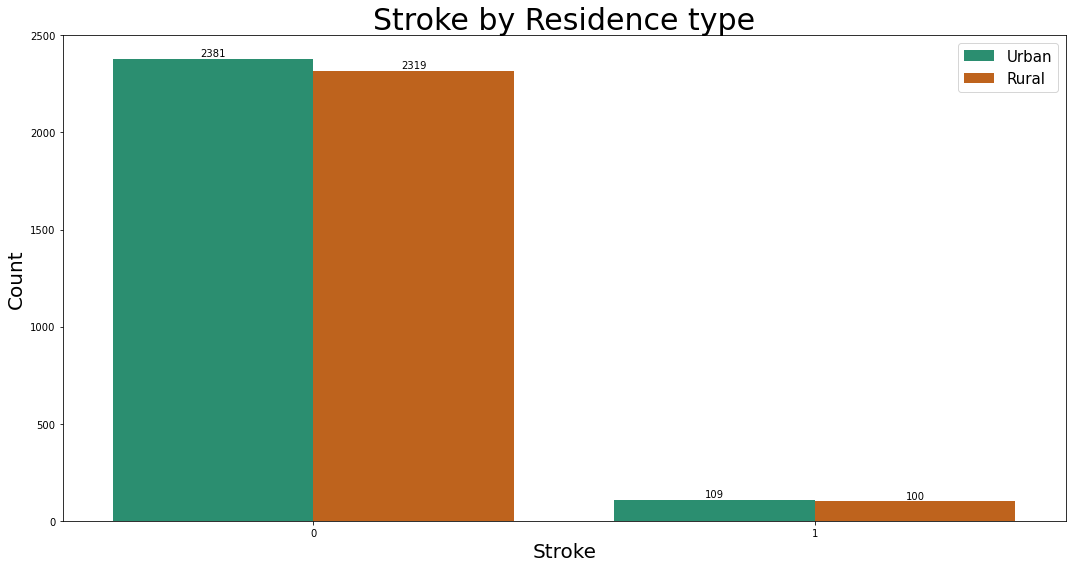

In [26]:
# Residence type
countplot('residence_type')

- no big difference between the population in urban and rural area

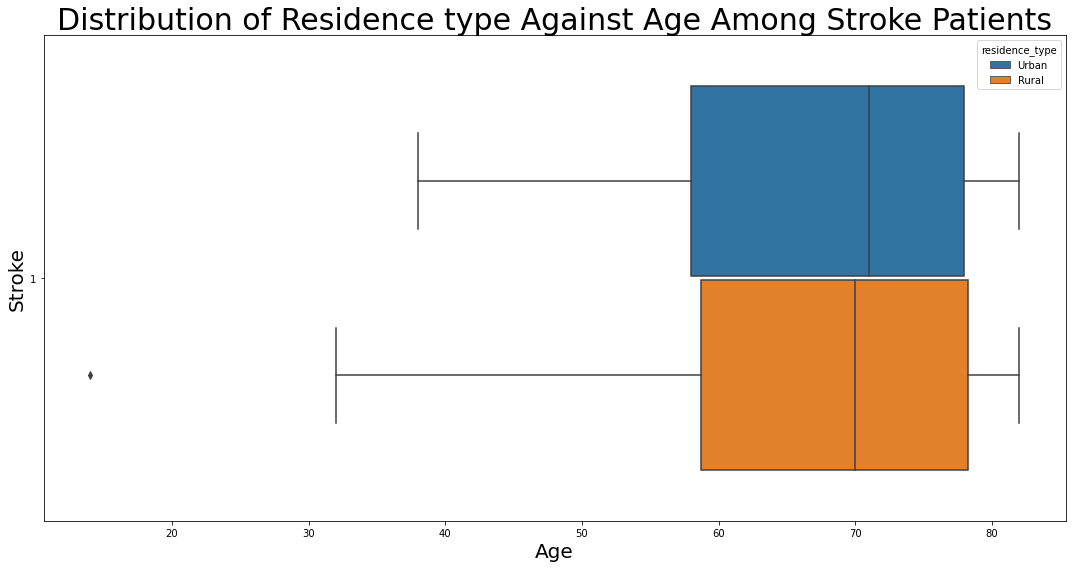

In [27]:
boxplot('residence_type')

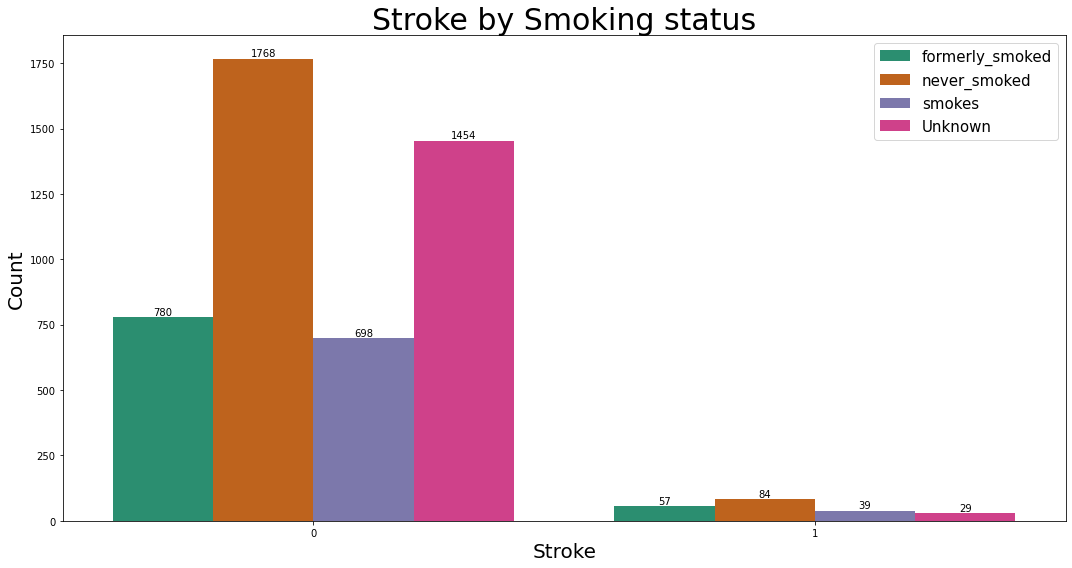

In [28]:
# Smoking status
countplot('smoking_status')

- most patients have never smoked
- however, there is also a lot of patients with unknown status
- surprisingly, a lot of stroke patients have never smoked at around 40% 
- of those that formerly smokes and smokes is around 46% of the stroke patients

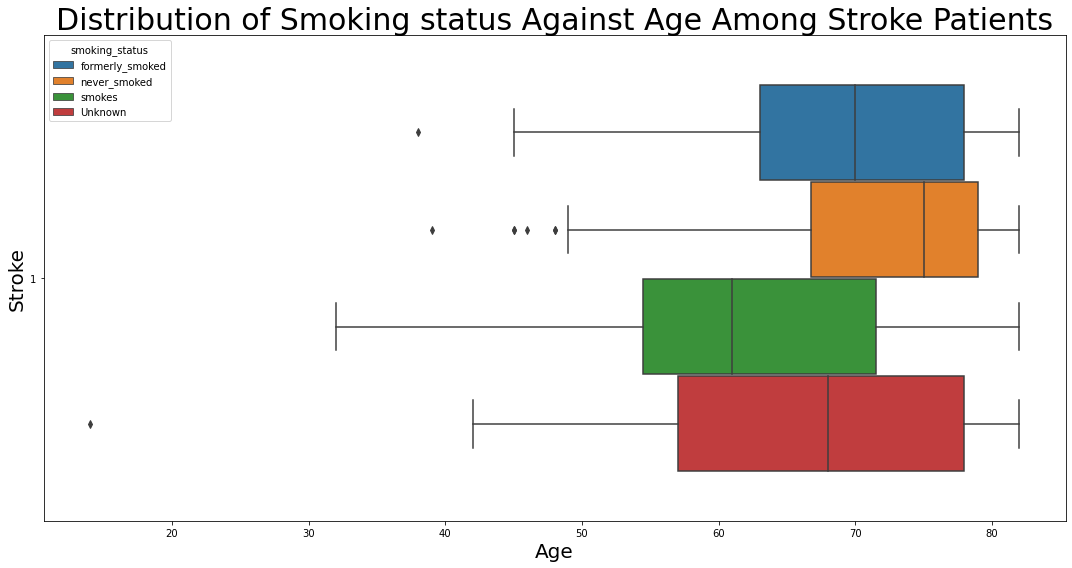

In [29]:
# Smoking status
boxplot('smoking_status')

- of the stroke patients, those who smokes experiences stroke at a younger median age of around 61